In [ ]:
%pip install pycaret

# New section

In [2]:
from pandas import *
from numpy import *
from datetime import datetime
from numpy import*
from pycaret import*
import lightgbm as lgb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from matplotlib import style
import matplotlib.dates as mdates
import plotly
import cufflinks as cf

cf.go_offline

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)

In [17]:
# load dataset

from pycaret.datasets import get_data
insurance = get_data('insurance')

# init environment
from pycaret.regression import *
r0 = setup(insurance,
           target = 'charges',
           session_id = 122,
           normalize = True,
           polynomial_features = True,
          #    rigonometry_features = True,
           #feature_interaction=True,
           # bin_numeric_features= ['age', 'bmi']
           )
#Model training and selection
print("Model training and selection")
best_lr= compare_models()

# Analyse best model
print('Analyse best model')
evaluate_model(best_lr)

# Predictions on new data
print("Predictions on new data")
predictions = predict_model(best_lr)

# save pipeline/model
print("save pipeline/model")
save_model(best_lr,'MLOps_Pipeline')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,Description,Value
0,Session id,122
1,Target,charges
2,Target type,Regression
3,Data shape,"(1338, 49)"
4,Train data shape,"(936, 49)"
5,Test data shape,"(402, 49)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


Model training and selection


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2688.8990,24139873.3976,4847.2644,0.8309,0.4090,0.2899,0.2420
catboost,CatBoost Regressor,2678.3241,24537297.5692,4887.7401,0.8277,0.4152,0.2811,2.9430
llar,Lasso Least Angle Regression,2968.7534,24883248.9741,4918.7956,0.8260,0.3897,0.2808,0.1260
ridge,Ridge Regression,3014.1283,25050380.4254,4933.4753,0.8250,0.4147,0.2989,0.2090
lasso,Lasso Regression,3017.7086,25065586.5301,4935.0065,0.8249,0.4164,0.3027,0.1260
br,Bayesian Ridge,3010.2038,25078933.1275,4936.1413,0.8248,0.4234,0.2927,0.1430
lr,Linear Regression,3018.1428,25087911.7192,4939.4124,0.8247,0.4194,0.3037,0.1480
lightgbm,Light Gradient Boosting Machine,2910.1079,25068472.5367,4949.9258,0.8235,0.4901,0.3433,0.1440
rf,Random Forest Regressor,2692.6584,25623754.1293,4997.3739,0.8192,0.4298,0.2816,0.9510
par,Passive Aggressive Regressor,2086.0855,26317604.3197,5044.3962,0.8158,0.3522,0.0847,0.2050


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Analyse best model


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Predictions on new data


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2525.2850,19679434.1167,4436.1508,0.8689,0.4403,0.2798


save pipeline/model
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/var/folders/sg/8dmzq1nn0wl6qmndt2sf_m1r0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('or...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                       

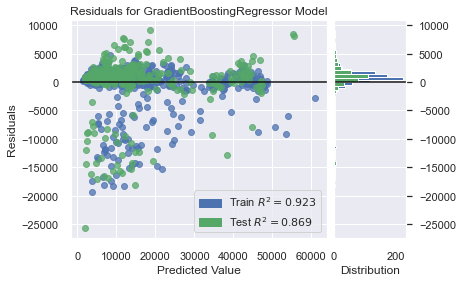

In [8]:
plot_model(best_lr)

In [9]:
model= load_model('MLOps_Pipeline')

Transformation Pipeline and Model Successfully Loaded


In [10]:
model

Pipeline(memory=Memory(location=/var/folders/sg/8dmzq1nn0wl6qmndt2sf_m1r0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('or...
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    tr

In [12]:
from pycaret.datasets import get_data
insurance = get_data('insurance')

#insurance = insurance.rename(columns={'charges': 'Label'})
print(insurance)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


      age     sex     bmi  children smoker     region        Label
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [14]:
from pycaret.regression import *
s = setup(insurance, target = 'Label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Label
2,Target type,Regression
3,Data shape,"(1338, 10)"
4,Train data shape,"(936, 10)"
5,Test data shape,"(402, 10)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [15]:
#Model training and selection
print("Model training and selection")
best_lr= compare_models()

# Analyse best model
print('Analyse best model')
evaluate_model(best_lr)

# Predictions on new data
print("Predictions on new data")
predictions = predict_model(best_lr)

# save pipeline/model
print("save pipeline/model")
save_model(best_lr,'MLOps_Pipeline')

Model training and selection


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.1030
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.3020
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,0.5570
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.3090
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.2150
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0860
llar,Lasso Least Angle Regression,4298.6038,38369142.0849,6174.9424,0.7309,0.5786,0.4424,0.0660
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0710
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0600
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0570


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Analyse best model


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Predictions on new data


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


save pipeline/model
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/var/folders/sg/8dmzq1nn0wl6qmndt2sf_m1r0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('or...
                                                                         {'col': 'smoker',
                                                                          'mapping': {nan: -1,
                                                                                      'no': 0,
                                                                                      'yes': 1}}]))),
                 ('onehot_encodin

In [16]:
r1 = setup(insurance,
           target = 'Label',
           session_id = 123,
           normalize = True,
           polynomial_features = True,
          #    rigonometry_features = True,
           #feature_interaction=True,
           # bin_numeric_features= ['age', 'bmi']
           )

    #Model training and selection
print("Model training and selection")
best_lr= compare_models()

# Analyse best model
print('Analyse best model')
evaluate_model(best_lr)

# Predictions on new data
print("Predictions on new data")
predictions = predict_model(best_lr)

# save pipeline/model
print("save pipeline/model")
save_model(best_lr,'MLOps_Pipeline')

,Description,Value
0,Session id,123
1,Target,Label
2,Target type,Regression
3,Data shape,"(1338, 49)"
4,Train data shape,"(936, 49)"
5,Test data shape,"(402, 49)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


Model training and selection


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2766.2634,24647474.0656,4952.0973,0.8232,0.4433,0.3265,0.3390
ridge,Ridge Regression,3127.0110,25462470.7747,5031.1189,0.8200,0.4533,0.3232,0.0780
lr,Linear Regression,3145.6374,25490552.6983,5034.0636,0.8199,0.4554,0.3302,0.4280
lasso,Lasso Regression,3136.0560,25504660.9340,5034.8556,0.8199,0.4536,0.3271,0.0950
br,Bayesian Ridge,3127.1470,25475568.3898,5032.7087,0.8197,0.4424,0.3201,0.0770
llar,Lasso Least Angle Regression,3096.7175,25552839.2050,5039.3486,0.8190,0.4212,0.3119,0.0750
catboost,CatBoost Regressor,2862.1662,25309853.2208,5013.8136,0.8189,0.4650,0.3380,4.1880
rf,Random Forest Regressor,2780.5808,25713285.3407,5054.4521,0.8158,0.4750,0.3335,0.7880
lightgbm,Light Gradient Boosting Machine,3037.1484,26055349.0533,5090.7346,0.8116,0.5419,0.3697,0.2310
huber,Huber Regressor,2136.6527,27100930.7798,5184.1513,0.8101,0.3981,0.0902,0.1630


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Analyse best model


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Predictions on new data


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2538.6123,19129350.9376,4373.7113,0.8661,0.4185,0.3227


save pipeline/model
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/var/folders/sg/8dmzq1nn0wl6qmndt2sf_m1r0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('or...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                       